('002691', '2018-10-07', '2019-01-15')
14
######### result #########
('wave_period_day:', 9)
('wave_crest_mean:', 8.06)
('wave_base_mean:', 7.01)
('wave_base_max:', 8.78)
('wave_base_now:', 7.81)


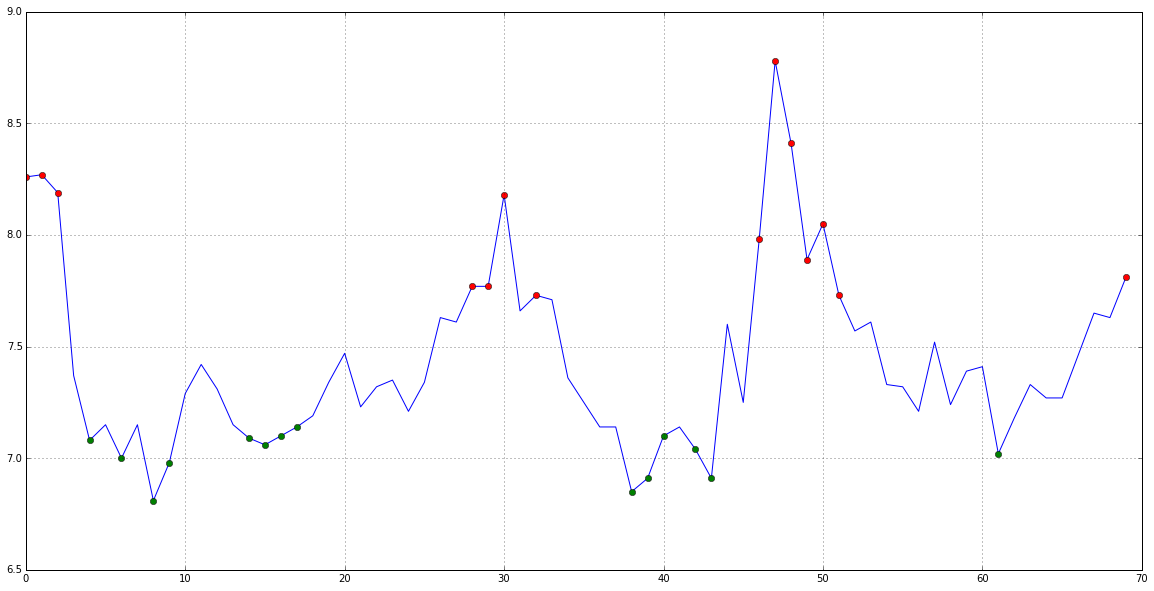

14
######### result #########
('wave_period_day:', 3)
('wave_crest_mean:', 8.09)
('wave_base_mean:', 7.07)
('wave_base_max:', 8.6)
('wave_base_now:', 7.56)


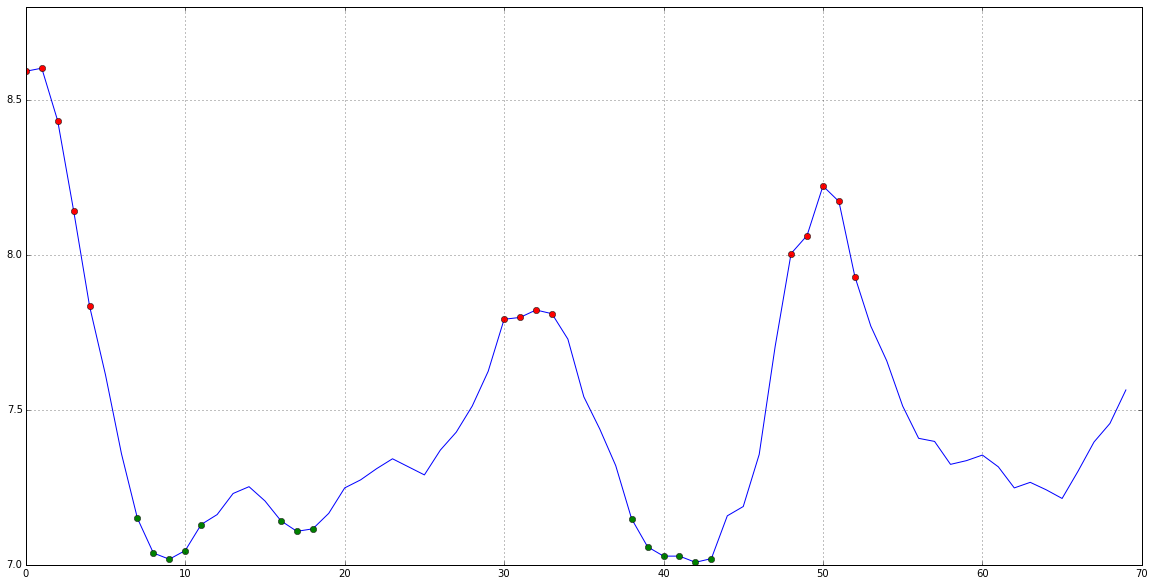

14
######### result #########
('wave_period_day:', 21)
('wave_crest_mean:', 161399.22)
('wave_base_mean:', 41218.31)
('wave_base_max:', 256077.01)
('wave_base_now:', 110874.53)


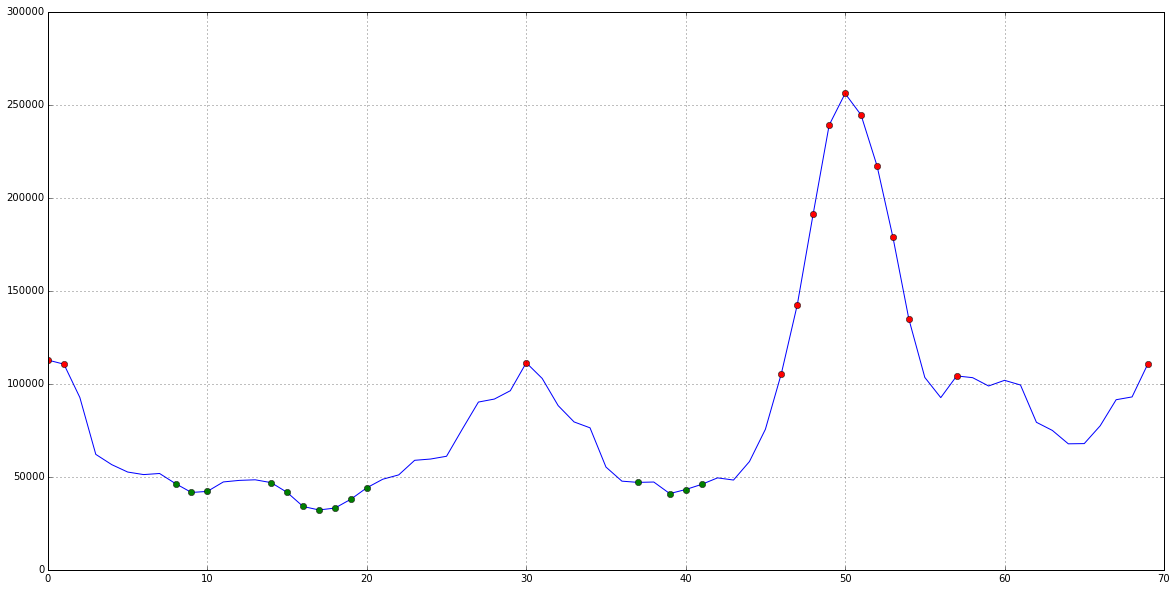

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import heapq
import tushare as ts
import datetime
%matplotlib inline
# from IPython.core.pylabtools import figsize
# figsize(8, 5)
#使用平安银行的数据
date_end = datetime.datetime(int(2019), int(1), int(15))
date_start = (date_end + datetime.timedelta(days=-100)).strftime("%Y-%m-%d") #往前90 天数据
date_end = date_end.strftime("%Y-%m-%d")
code = "002691"
#测试
print(code, date_start, date_end)

#假设股票数据
# open, high, close, low, volume, price_change, p_change, ma5, ma10, ma20, v_ma5, v_ma10, v_ma20, turnover
stock = ts.get_hist_data(code, start=date_start, end=date_end)
stock = stock.sort_index(0)  # 将数据按照日期排序下。

#打印头和尾部数据
# print(len(stock))
# print(stock.head(1))
# print(stock.tail(1))

def wave_guess(arr):
    wn = int(len(arr)/5) #没有经验数据，先设置成1/4。
    print(wn)
    #计算最小的N个值，也就是认为是波谷
    wave_crest = heapq.nlargest(wn, enumerate(arr), key=lambda x: x[1])
    wave_crest_mean = pd.DataFrame(wave_crest).mean()

    #计算最大的5个值，也认为是波峰
    wave_base = heapq.nsmallest(wn, enumerate(arr), key=lambda x: x[1])
    wave_base_mean = pd.DataFrame(wave_base).mean()

    print("######### result #########")
    #波峰，波谷的平均值的差，是波动周期，对于股票就是天。
    wave_period = abs(int( wave_crest_mean[0] - wave_base_mean[0]))
    print("wave_period_day:", wave_period)
    print("wave_crest_mean:", round(wave_crest_mean[1],2))
    print("wave_base_mean:", round(wave_base_mean[1],2))
    print("wave_base_max:", round(max(arr),2))
    print("wave_base_now:", round(arr.tolist()[-1],2))

    ############### 以下为画图显示用 ###############
    wave_crest_x = [] #波峰x
    wave_crest_y = [] #波峰y
    for i,j in wave_crest:
        wave_crest_x.append(i)
        wave_crest_y.append(j)

    wave_base_x = [] #波谷x
    wave_base_y = [] #波谷y
    for i,j in wave_base:
        wave_base_x.append(i)
        wave_base_y.append(j)

    #将原始数据和波峰，波谷画到一张图上
    plt.figure(figsize=(20,10))
    plt.plot(arr)
    plt.plot(wave_base_x, wave_base_y, 'go')#红色的点
    plt.plot(wave_crest_x, wave_crest_y, 'ro')#蓝色的点
    plt.grid()
    plt.show()

#使用收盘价格画图：
arr1 = pd.Series(stock["close"].values)
wave_guess(arr1)

arr2 = pd.Series(stock["ma5"].values)
wave_guess(arr2)

arr3 = pd.Series(stock["v_ma5"].values)
wave_guess(arr3)